Aclaración:  
Hasta ahora habíamos trabajado con el qubit menos significativo abajo del todo. De este modo si teníamos 4 qubits y queríamos poner el número 3, haciamos lo siguiente:

--|0>--  
--|0>--  
--|1>--  
--|1>--  

ya que |0011> es el número 3 en binario. Sin embargo para qiskit o quirk, el qubit menos significativo se encuentra arriba del todo, por lo que si queremos representar el número 3, para qiskit sería:

--|1>--  
--|1>--  
--|0>--  
--|0>--  

In [4]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector 
from numpy import pi


In [5]:
def QFT(n):
    # n := número de qubits
    
    qft_circ = QuantumCircuit(n,n)
    
    for i in range(n-1, -1, -1): # luego i va de n-1 a 0, restando de uno en uno
        
        qft_circ.h(i) # primero añadimos la puerta H
        
        for j in range(i - 1, -1, -1): 
            # por definir así la j, hacemos el CU1 con todos los qubits que quedan por encima
            
            #primero pasamos el parámetro luego el qubit de control y luego el objetivo
            qft_circ.cu1(pi/(2 ** (i - j)), j, i)
    
        qft_circ.barrier(range(n))
        
    for i in range(n // 2): # hacemos el swap final para que queden bien cuadrados
        qft_circ.swap(i, n - i - 1)
        
    return qft_circ

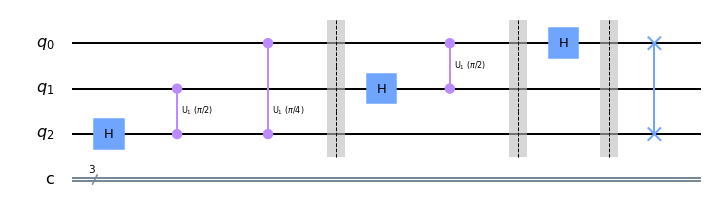

In [6]:
QFT(3).draw('mpl')

In [7]:
# veamos como se representa el numero 3 cuando tenemos 2 qubits
n = 2
circ = QuantumCircuit(n)

# el numero tres sería |11> , luego creamos esas dos puertas x
circ.x(0)
circ.x(1)

circ += QFT(n) # añadimos la transformada de Fourier para dos qubits.



Ahora vamos a trabajar con el statevector simulator. Basicamente es un simulador que nos da el vector solución (no colapsará hacia ningún estado). Este simulador solo se suele utilizar para entender lo que está pasando y ver resultados de una forma clara, un computador cuántico nunca nos dará el estado real de un qubit, si no hacia que valor colapsa.

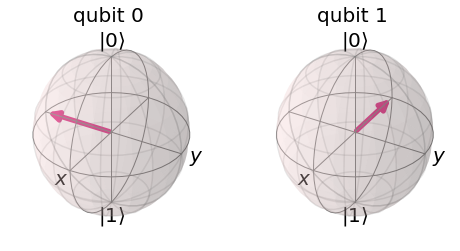

In [8]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(circ, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

Como podeis ver, los resultados son los esperados ya que el primer qubit recorre 3/4 de la circunferencia y el segundo qubit el doble, 6/4 (que eqivale a dar una vuelta y media)

La transformada inversa se sacaría de la misma manera. Tan solo habría que ver que puertas van anulando las de la tranformada normal. Por lo tanto empezaríamos con los swap y luego con rotaciones del mismo ángulo en sentido opuesto.